![Colab](https://www.tensorflow.org/images/colab_logo_32px.png) [Run in Google Colab](https://colab.research.google.com/drive/1RWbCZhUbTxl_ClHrMcox1w3ZTvpjNjRp?usp=sharing) ![GitHub](https://www.tensorflow.org/images/GitHub-Mark-32px.png) [View source on GitHub](https://github.com/TanyaYu/Curriculum-Project/blob/master/module1/Binary_Classification.ipynb)

# The Vehicle Dataset

The vehicle dataset was collected by Leetron Vision for A.I. Count project - a portable real-time video-based traffic counting unit. The size of the dataset is almost 15,000 samples. Each sample is a vehicle image 64x32 pixels. The dataset includes 6 different types of vehicles: 
- Class 1 - Motorcycles
- Class 2 - Cars
- Class 3 - Pickup Trucks
- Class 4 - Buses
- Class 5 - Trucks
- Class 6 - Tractor Trailers

![vehicle classes](https://storage.googleapis.com/vehicle-dataset/vehicle%20classes.png)

Each image has a color line on the left indicating the car lane on the high way. A green line identifies that the vehicle is in lane 1 (the right most lane), blue - lane 2, and red - lane 3 (the left most lane).

![AI Count](https://storage.googleapis.com/vehicle-dataset/AI%20Count.png)

# Motorcycles vs. Cars
Motorcycles vs. Cars dataset is a part of the full dataset and includes only Class 1 (Motorcycles) and Class 2 (Cars) samples. It includes train and test portion with 80% split. The dataset has the following directory structure:
```
motorcycles_vs_cars
|__ test
   |____ Class1
   |____ Class2
|__ train
   |____ Class1
   |____ Class2
```

It's available for download [here](https://storage.googleapis.com/vehicle-dataset/motorcycles_vs_cars.zip).

Use `plot_images` to check if the import was completed successfully and that images are available in the notebook.

In [ ]:
from tensorflow.keras.utils import get_file
import os

url = 'https://storage.googleapis.com/vehicle-dataset/motorcycles_vs_cars.zip'
path_to_zip =get_file('motorcycles_vs_cars.zip', origin=url, extract=True)
path = os.path.join(os.path.dirname(path_to_zip), 'motorcycles_vs_cars')

In [ ]:
train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

In [ ]:
# This function plots images from a folder. 

import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import random

def plot_images(source_path):
    files=[]
    classes = glob.glob(source_path + '/*')
    for class_path in classes:
        files.extend([f for f in glob.glob(class_path + "/*", recursive=True)])
    random.shuffle(files)
    plt.figure(figsize=(16, 8))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        img = image.load_img(files[i], target_size=(32, 64))
        plt.imshow(img, cmap=plt.cm.binary)
    plt.show()

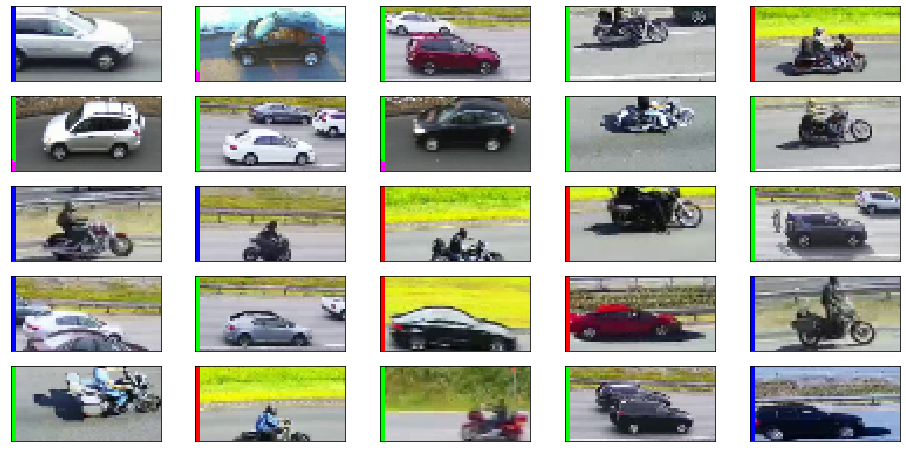

In [ ]:
plot_images(train_dir)

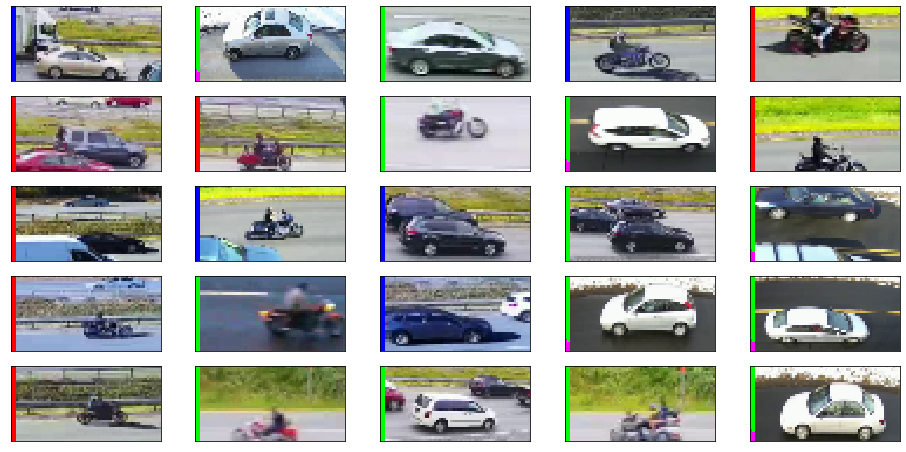

In [ ]:
plot_images(test_dir)

# Data Preparation

In [ ]:
IMG_HEIGHT = 32
IMG_WIDTH = 64

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255)
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 232 images belonging to 2 classes.


# Simple Neural Network
- Create Sequential model
- Compile the model and specify loss funtion, optimizer, and learning rate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import tensorflow as tf  
tf.get_logger().setLevel('ERROR')

%load_ext tensorboard

model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Flatten(),
    Dense(1)
])

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 64, 16)        64        
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 32769     
Total params: 32,833
Trainable params: 32,833
Non-trainable params: 0
_________________________________________________________________


Model architecture is demonstarated below

![model](https://storage.googleapis.com/vehicle-dataset/model.png)


Detailed information on each layer:

![layers](https://storage.googleapis.com/vehicle-dataset/layers.png)

In [ ]:
import datetime
import tensorflow as tf

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model

In [ ]:
history = model.fit_generator(train_data_gen, epochs=3, callbacks=[tensorboard_callback])

Epoch 1/3
8/8 [==============================] - 1s 80ms/step - loss: 0.6747 - acc: 0.5000
Epoch 2/3
8/8 [==============================] - 0s 24ms/step - loss: 0.6484 - acc: 0.5000
Epoch 3/3
8/8 [==============================] - 0s 33ms/step - loss: 0.6149 - acc: 0.5431


In [ ]:
def plot_training_history(h):
    acc = h.history['accuracy']

    loss = h.history['loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.legend(loc='upper right')
    plt.title('Training Loss')
    plt.show()

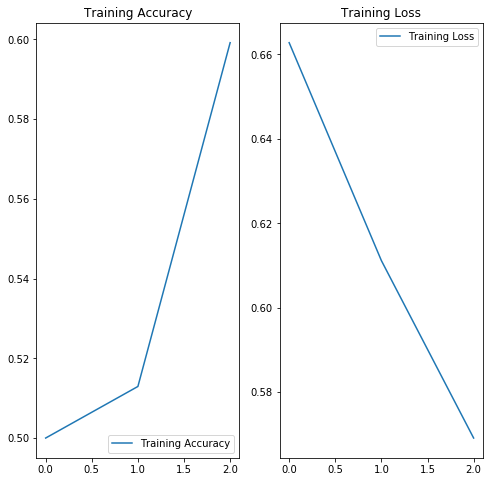

In [ ]:
plot_training_history(history)

In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 26549), started 0:00:55 ago. (Use '!kill 26549' to kill it.)

# Evaluate the model on test dataset

In [ ]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                         shuffle=False,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='binary')

Found 58 images belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_data_gen)
print("loss: %f, accuracy: %f" % (loss, accuracy))

2/2 [==============================] - 0s 53ms/step - loss: 0.5555 - acc: 0.6207
loss: 0.555452, accuracy: 0.620690


# Exercises

## Exercise 1
Is Motorcyclers vs. Cars balanced or unbalanced dataset? Print number of samples in each class in training dataset and plot a pie chart to demonstrate proportion. 

In [ ]:
import pandas as pd
train_df = pd.DataFrame({"filename": train_data_gen.filenames, 
                         "class": train_data_gen.classes}) 
train_df.head()

,filename,class
0,Class2\__000_L0_F100656_39859537.bmp,0
1,Class2\__000_L0_F101727_41723451.bmp,0
2,Class2\__000_L0_F102243_41580223.bmp,0
3,Class2\__000_L0_F103187_41724203.bmp,0
4,Class2\__000_L0_F103194_41516198.bmp,0


In [ ]:
train_counts = train_df['class'].value_counts()
train_counts

0    1612
1    1611
Name: class, dtype: int64

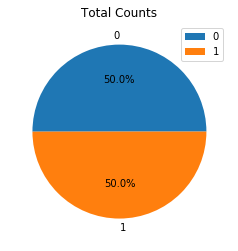

In [ ]:
train_counts.plot.pie(autopct='%1.1f%%', 
                      title="Total Counts",
                      label="",
                      legend=True)

## Exercise 2
Increase number of epochs to train the model longer. Make sure to reinitialize the network and recompile it if you want to start traning over. How did train and test accuracy change?

Epoch 1/10
8/8 [==============================] - 0s 41ms/step - loss: 0.6799 - accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 0s 40ms/step - loss: 0.6208 - accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 0s 34ms/step - loss: 0.5833 - accuracy: 0.5216
Epoch 4/10
8/8 [==============================] - 0s 36ms/step - loss: 0.5403 - accuracy: 0.6034
Epoch 5/10
8/8 [==============================] - 0s 41ms/step - loss: 0.5234 - accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 38ms/step - loss: 0.4880 - accuracy: 0.7414
Epoch 7/10
8/8 [==============================] - 0s 37ms/step - loss: 0.4624 - accuracy: 0.7198
Epoch 8/10
8/8 [==============================] - 0s 37ms/step - loss: 0.4479 - accuracy: 0.7802
Epoch 9/10
8/8 [==============================] - 0s 40ms/step - loss: 0.4260 - accuracy: 0.8147
Epoch 10/10
8/8 [==============================] - 0s 43ms/step - loss: 0.4012 - accuracy: 0.8147


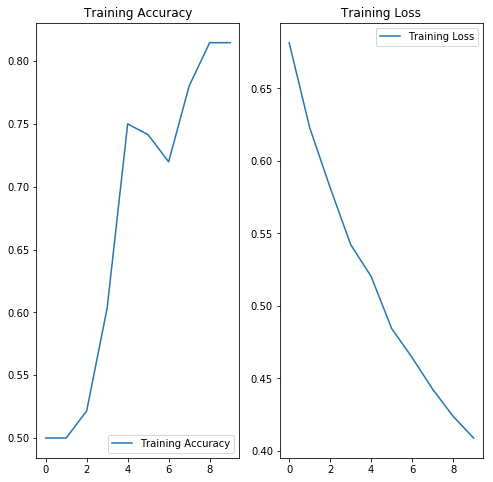

2/2 [==============================] - 0s 114ms/step - loss: 0.4501 - accuracy: 0.7586


[0.45012249052524567, 0.7586207]

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(1)
])

model.compile(optimizer=Adam(lr=0.0001),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(train_data_gen, epochs=10)

plot_training_history(history)

model.evaluate(test_data_gen)

## Exercise 3
Increase learning rate to make the model train faster or slow down training process by decreasing lerning rate. Find an apropriate learning rate to avoid model underfitting and overfitting.

Epoch 1/10
8/8 [==============================] - 0s 45ms/step - loss: 3.4656 - accuracy: 0.6164
Epoch 2/10
8/8 [==============================] - 0s 44ms/step - loss: 0.7671 - accuracy: 0.7931
Epoch 3/10
8/8 [==============================] - 0s 37ms/step - loss: 0.3456 - accuracy: 0.8621
Epoch 4/10
8/8 [==============================] - 0s 36ms/step - loss: 0.2606 - accuracy: 0.8836
Epoch 5/10
8/8 [==============================] - 0s 40ms/step - loss: 0.2207 - accuracy: 0.9138
Epoch 6/10
8/8 [==============================] - 0s 43ms/step - loss: 0.1973 - accuracy: 0.8966
Epoch 7/10
8/8 [==============================] - 0s 38ms/step - loss: 0.1738 - accuracy: 0.9353
Epoch 8/10
8/8 [==============================] - 0s 40ms/step - loss: 0.1274 - accuracy: 0.9397
Epoch 9/10
8/8 [==============================] - 0s 40ms/step - loss: 0.1017 - accuracy: 0.9526
Epoch 10/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0928 - accuracy: 0.9612


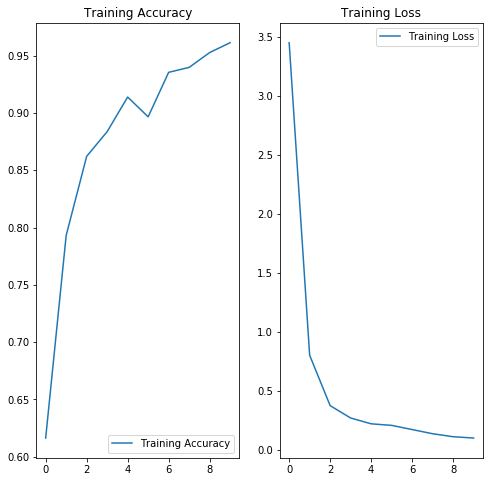

2/2 [==============================] - 0s 65ms/step - loss: 0.5551 - accuracy: 0.8793


[0.5550915971398354, 0.87931037]

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(1)
])

model.compile(optimizer=Adam(lr=0.01),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(train_data_gen, epochs=10)

plot_training_history(history)

model.evaluate(test_data_gen)

## Exercise 4
Experiment with different optimizers. Besides Adam you can try SGD, Adagrad, Nadam, etc. You might adjust learning rate or number of epochs for different optimizers. Which one did work the best for this model?

Epoch 1/15
8/8 [==============================] - 0s 45ms/step - loss: 2.7583 - accuracy: 0.5647
Epoch 2/15
8/8 [==============================] - 1s 63ms/step - loss: 0.8011 - accuracy: 0.7931
Epoch 3/15
8/8 [==============================] - 0s 38ms/step - loss: 0.4909 - accuracy: 0.8017
Epoch 4/15
8/8 [==============================] - 0s 55ms/step - loss: 0.2227 - accuracy: 0.8966
Epoch 5/15
8/8 [==============================] - 0s 58ms/step - loss: 0.2039 - accuracy: 0.9009
Epoch 6/15
8/8 [==============================] - 0s 42ms/step - loss: 0.1527 - accuracy: 0.9310
Epoch 7/15
8/8 [==============================] - 0s 51ms/step - loss: 0.4790 - accuracy: 0.8793
Epoch 8/15
8/8 [==============================] - 0s 53ms/step - loss: 0.1098 - accuracy: 0.9655
Epoch 9/15
8/8 [==============================] - 0s 44ms/step - loss: 0.1182 - accuracy: 0.9655
Epoch 10/15
8/8 [==============================] - 0s 51ms/step - loss: 0.0490 - accuracy: 0.9784
Epoch 11/15
8/8 [============

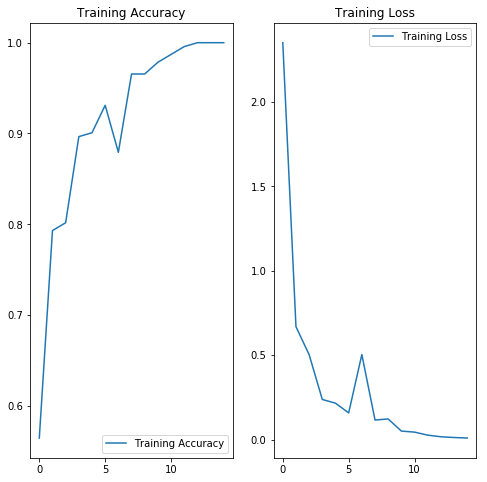

2/2 [==============================] - 0s 65ms/step - loss: 0.5161 - accuracy: 0.9138


[0.5160612016916275, 0.9137931]

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Flatten(),
    Dense(1)
])

from tensorflow.keras.optimizers import SGD, Adagrad, Nadam
model.compile(optimizer=Nadam(learning_rate=0.01),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(train_data_gen, epochs=15)

plot_training_history(history)

model.evaluate(test_data_gen)

## Exercise 5
Add more dense layers to the model. They may have different number of neurons. Again, you might want to adjust learning rate or number of epochs to achive better results. How does making a model deeper affect training process? Training and test results?

Epoch 1/15
8/8 [==============================] - 6s 788ms/step - loss: 0.7365 - accuracy: 0.5905
Epoch 2/15
8/8 [==============================] - 6s 760ms/step - loss: 0.6396 - accuracy: 0.6552
Epoch 3/15
8/8 [==============================] - 6s 729ms/step - loss: 0.4233 - accuracy: 0.7802
Epoch 4/15
8/8 [==============================] - 6s 749ms/step - loss: 0.4666 - accuracy: 0.7586
Epoch 5/15
8/8 [==============================] - 6s 741ms/step - loss: 0.3727 - accuracy: 0.8147
Epoch 6/15
8/8 [==============================] - 6s 700ms/step - loss: 0.3380 - accuracy: 0.8621
Epoch 7/15
8/8 [==============================] - 6s 754ms/step - loss: 0.2781 - accuracy: 0.8707
Epoch 8/15
8/8 [==============================] - 6s 742ms/step - loss: 0.3224 - accuracy: 0.8534
Epoch 9/15
8/8 [==============================] - 6s 710ms/step - loss: 0.2889 - accuracy: 0.8836
Epoch 10/15
8/8 [==============================] - 6s 744ms/step - loss: 0.2635 - accuracy: 0.8879
Epoch 11/15
8/8 [==

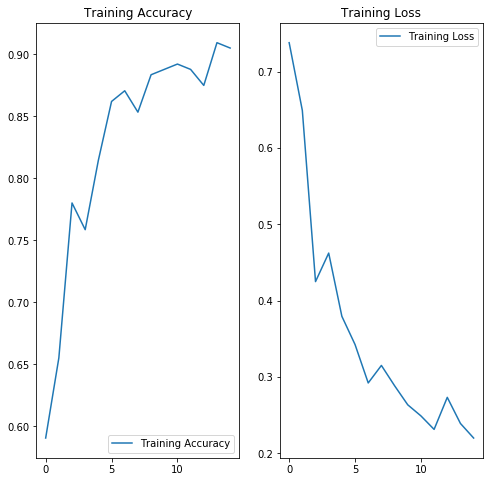

2/2 [==============================] - 0s 141ms/step - loss: 0.3310 - accuracy: 0.8276


[0.33098727464675903, 0.82758623]

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Nadam(learning_rate=0.0001),
              loss=BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(train_data_gen, epochs=15)

plot_training_history(history)

model.evaluate(test_data_gen)

## Exercise 6
Build a ROC curve for the last model.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
y_pred = model.predict(test_data_gen, batch_size=None)
fpr, tpr, _ = roc_curve(test_data_gen.classes, y_pred)
auc(fpr, tpr)

0.9476813317479191

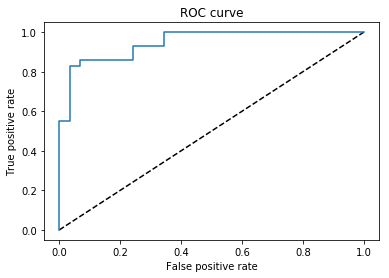

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

## Exercise 7
Build a model to classify [Cars vs. Pickup Trucks](https://storage.googleapis.com/vehicle-dataset/cars_vs_trucks.zip)

In [ ]:
url = 'https://storage.googleapis.com/vehicle-dataset/cars_vs_trucks.zip'
path_to_zip =get_file('cars_vs_trucks.zip', origin=url, extract=True)
path = os.path.join(os.path.dirname(path_to_zip), 'cars_vs_trucks')

train_dir = os.path.join(path, "train")
test_dir = os.path.join(path, "test")

In [ ]:
plot_images(train_dir)